In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os

import pandas as pd

from src import Config
from src.common.logger import ILogger, Logger
from src.feature import Preprocess
from src.feature.preprocess.data_dto import DataDto
from src.model import AutoGluon
from src.feature import VoxelGridBuilder
from src.feature.display import Plot

## Reading train and test data from csv

In [26]:
train_data: pd.DataFrame = pd.read_csv(os.path.join(Config.DATASETS_DIR.value, 'labled_dataset.csv'))
test_data: pd.DataFrame = pd.read_csv(os.path.join(Config.DATASETS_DIR.value, 'raw_point_cloud.csv'))

In [27]:
raw_data: DataDto = DataDto(train_data, test_data)

## Preprocessing

In [28]:
logger: ILogger = Logger()
preprocess: Preprocess = Preprocess(dto=raw_data, logger=logger)

## AutoGluon predictor

In [29]:
auto_gluon: AutoGluon = AutoGluon(
    train_dto=preprocess.train_dto,
    test_dto=preprocess.test_dto,
    logger=logger,
    train_max_minutes=300
)

## Feature analysis

In [30]:
train_plotter: Plot = Plot(auto_gluon.train_dto, filename='train_data')

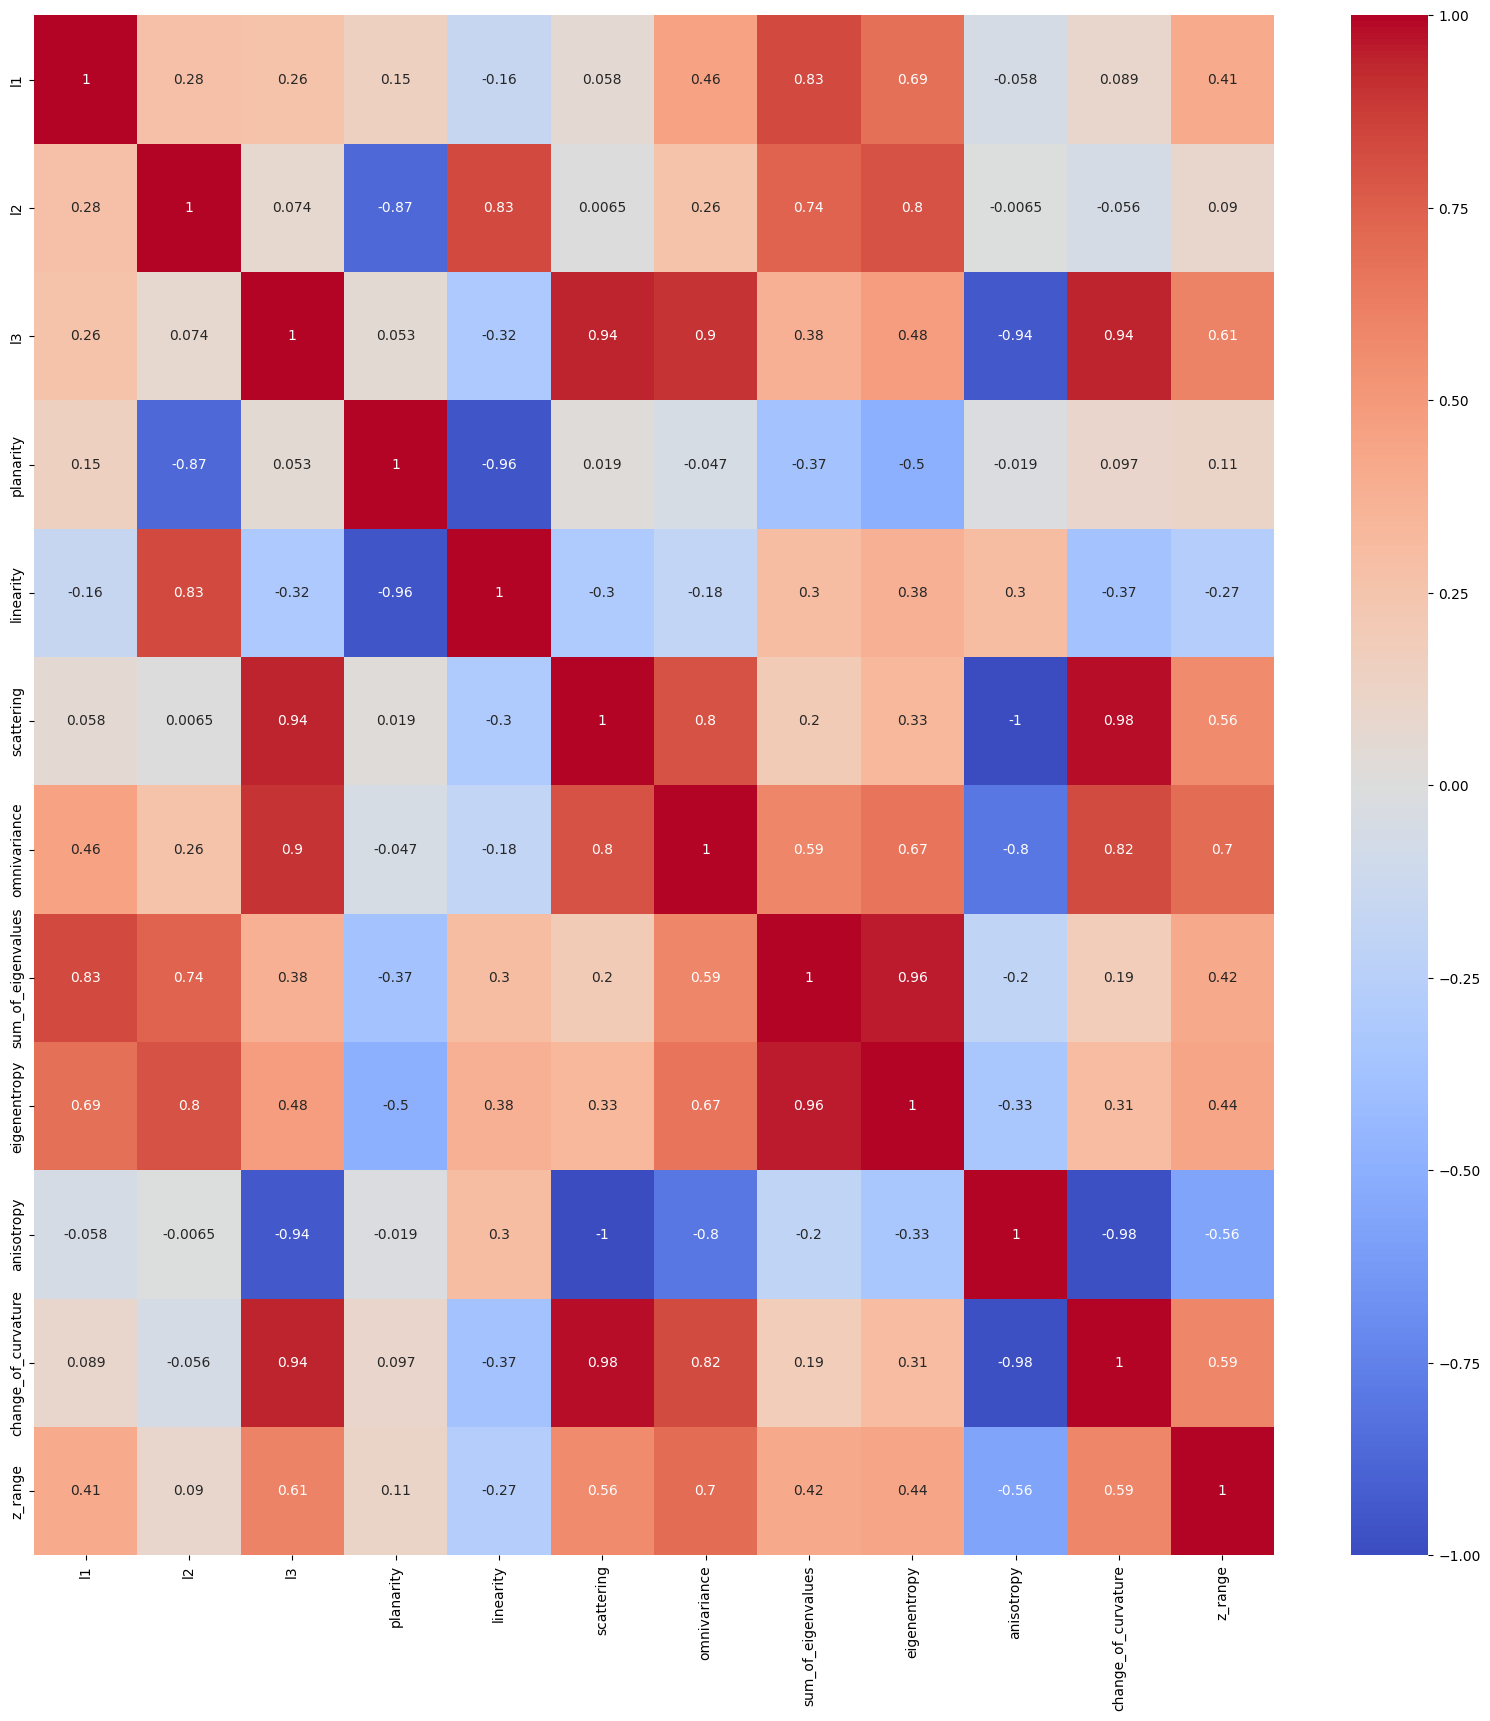

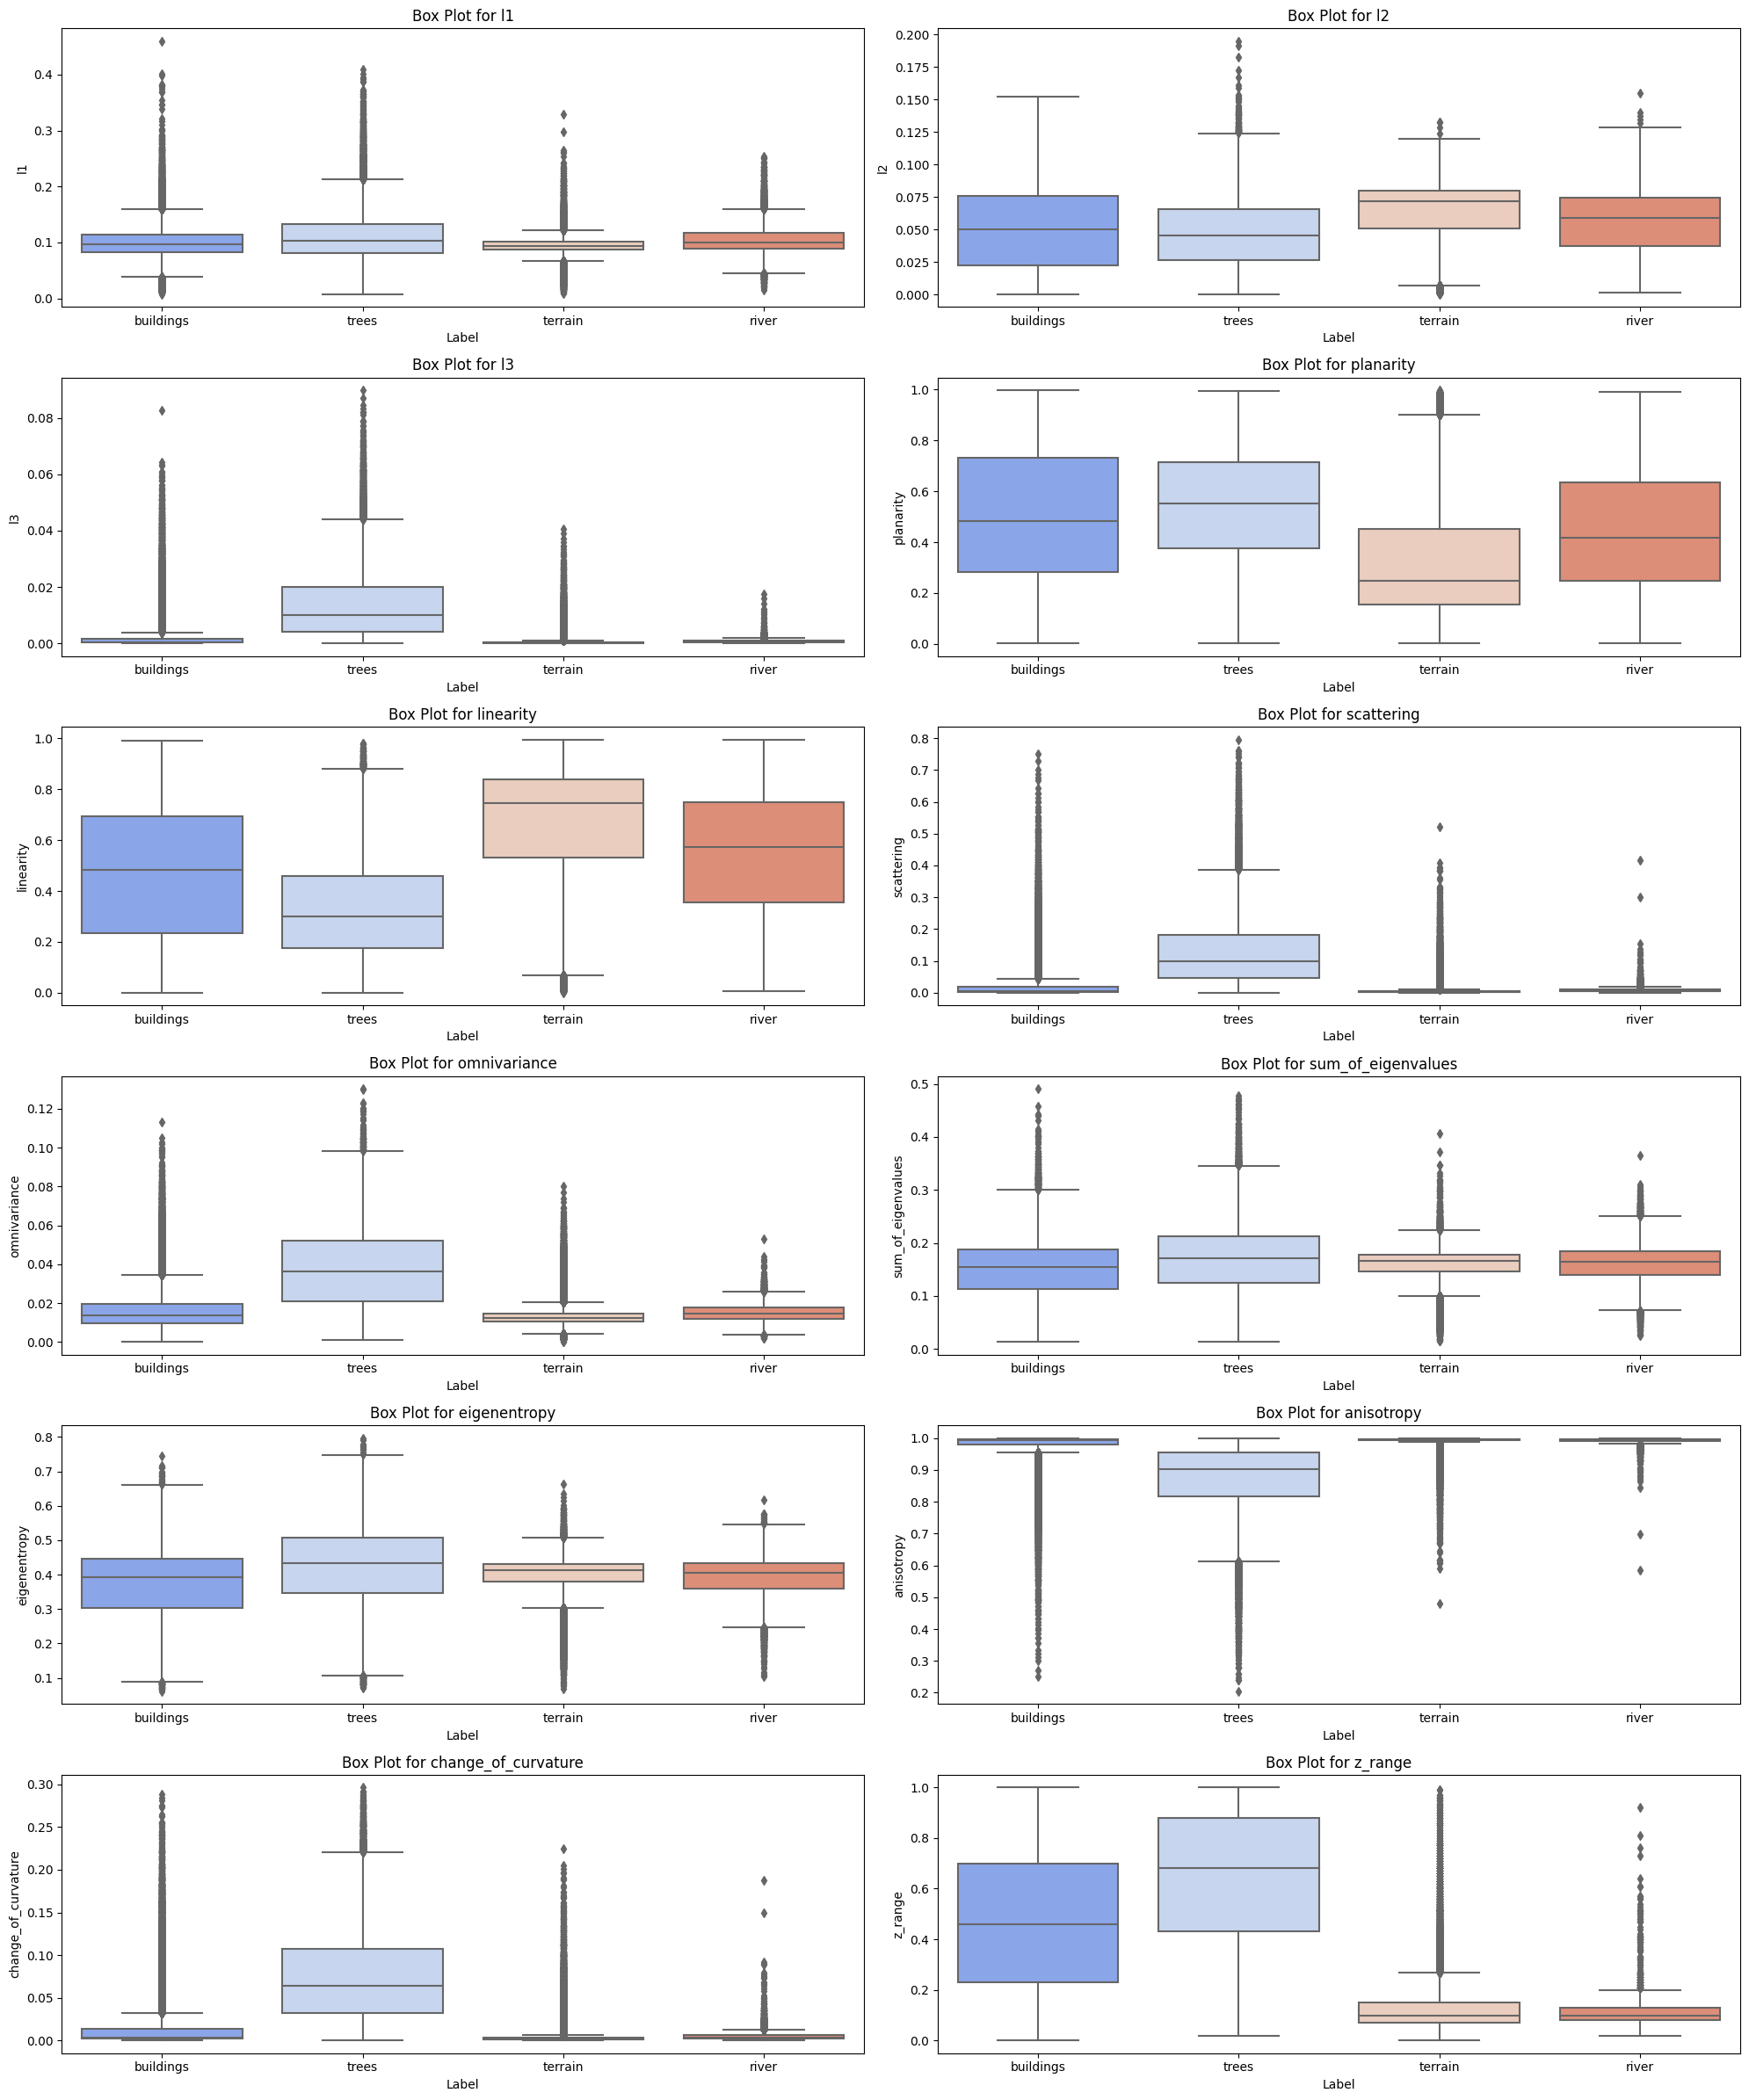

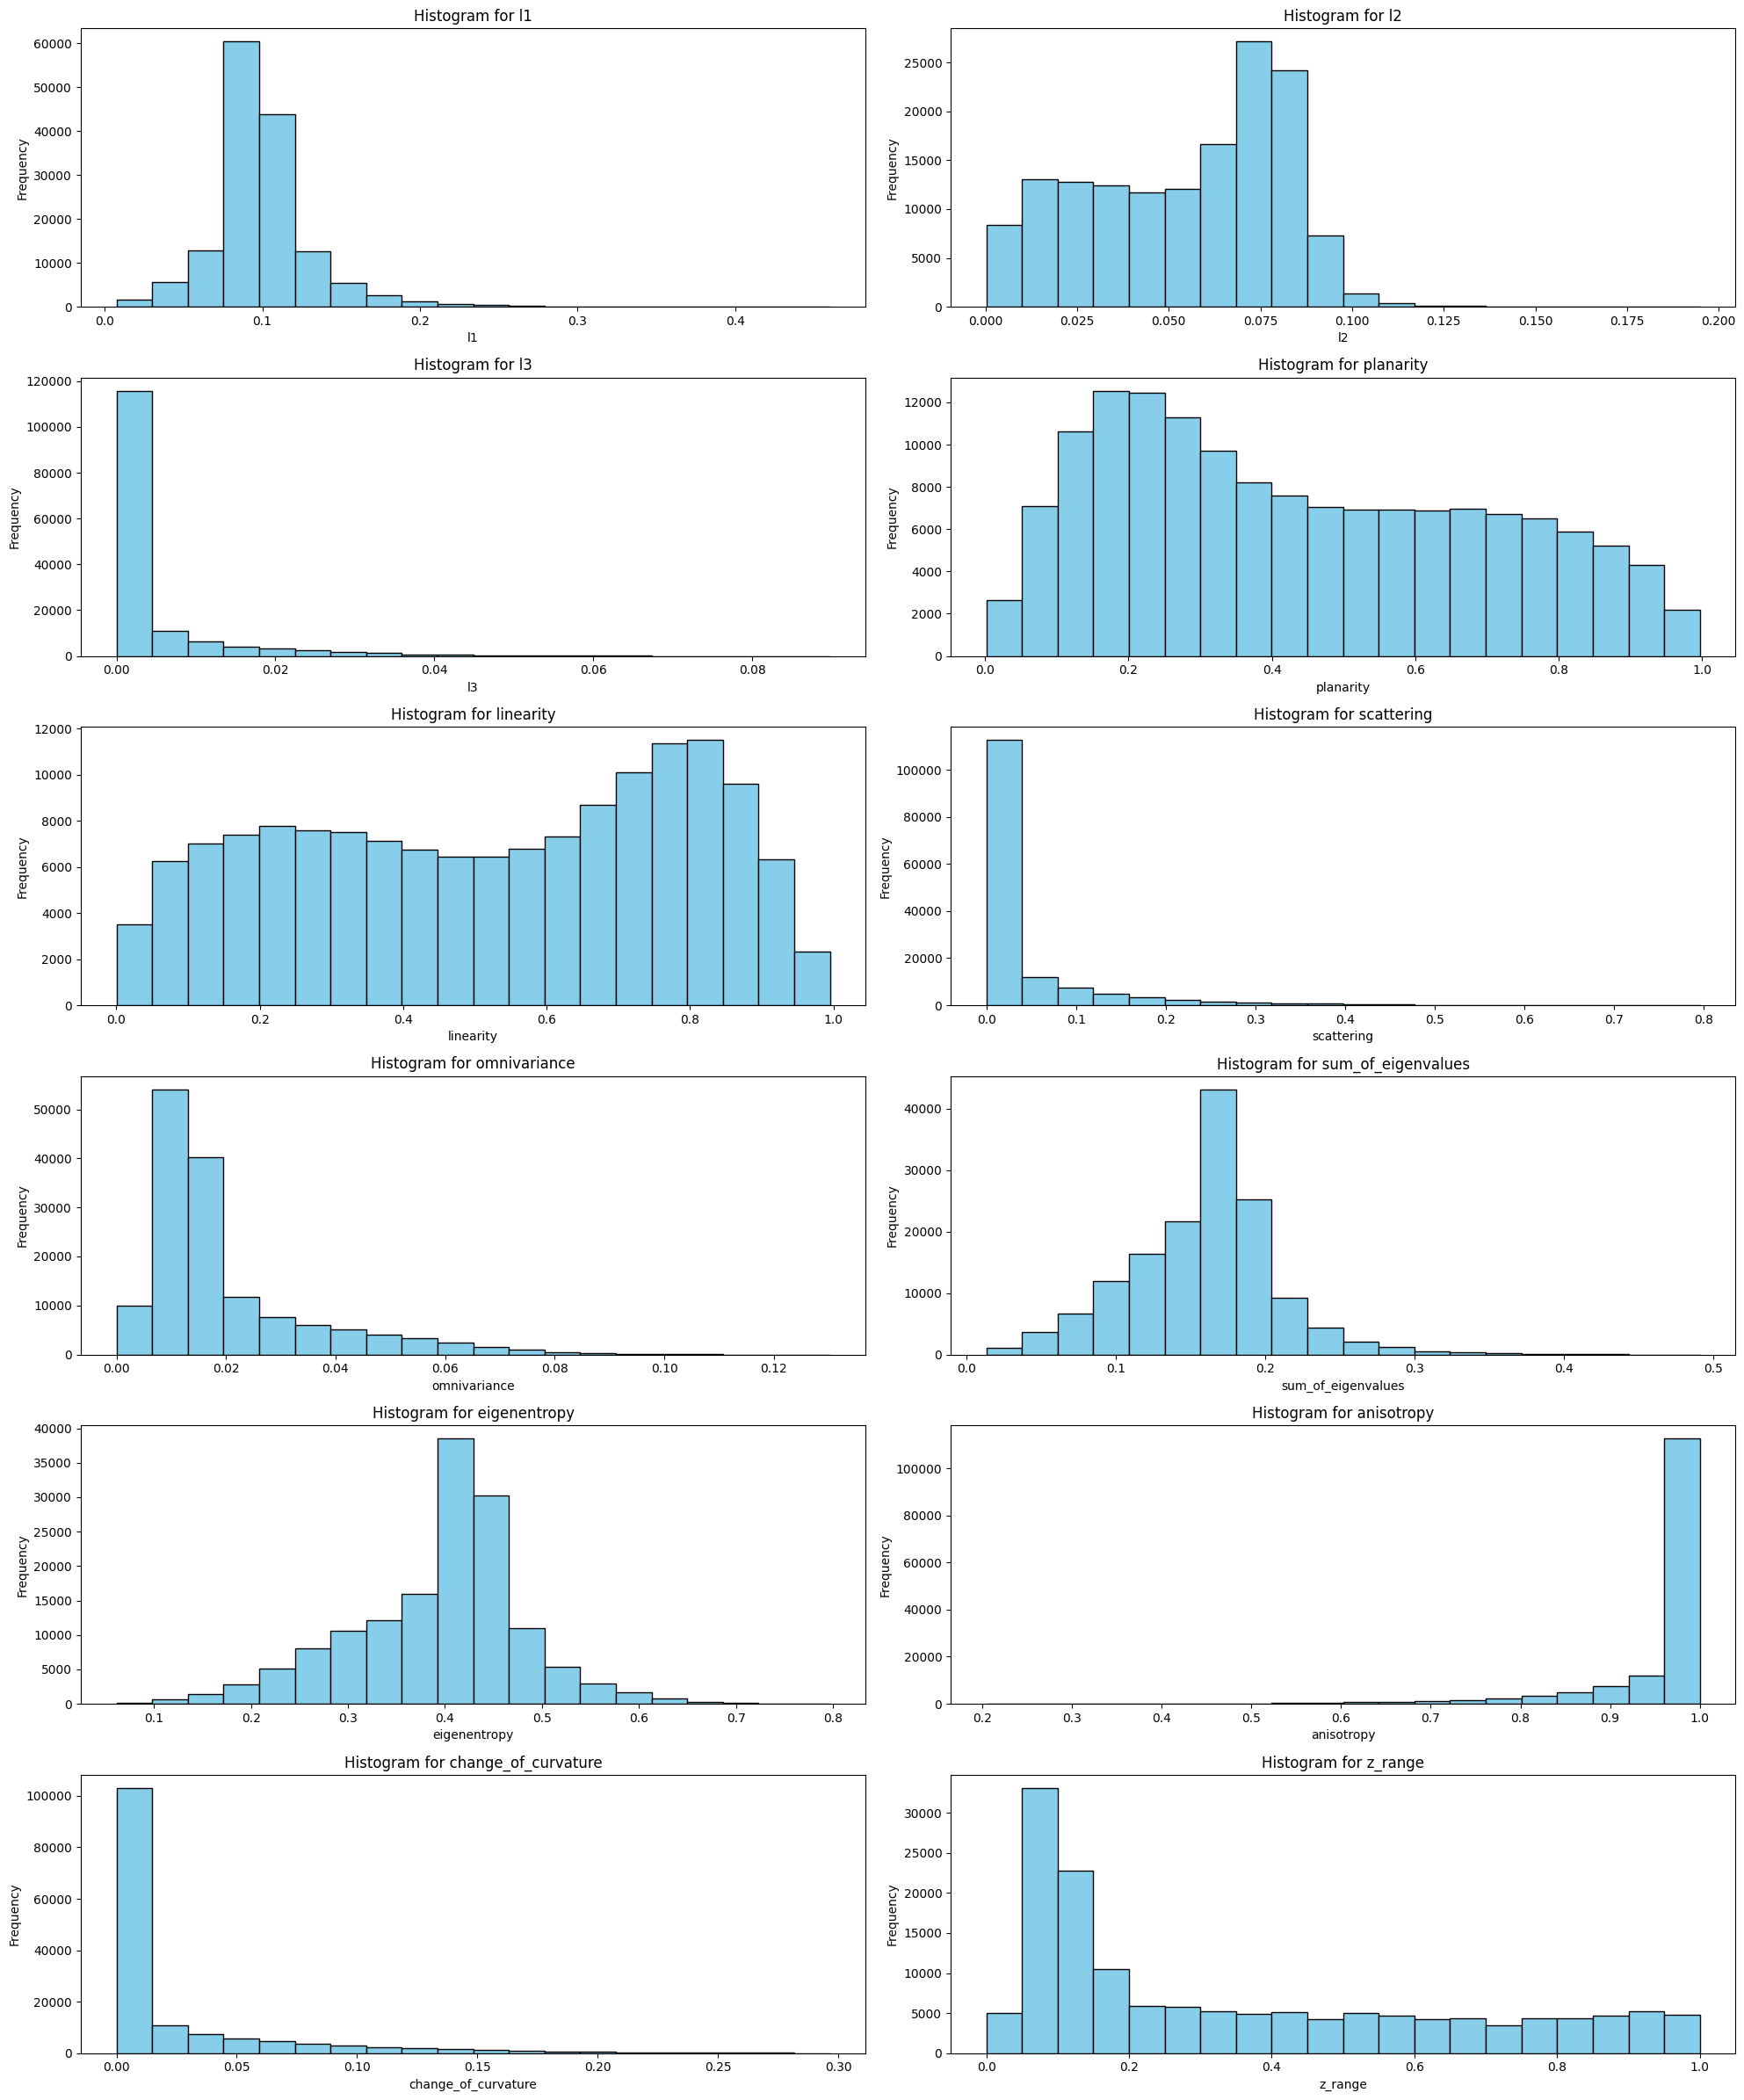

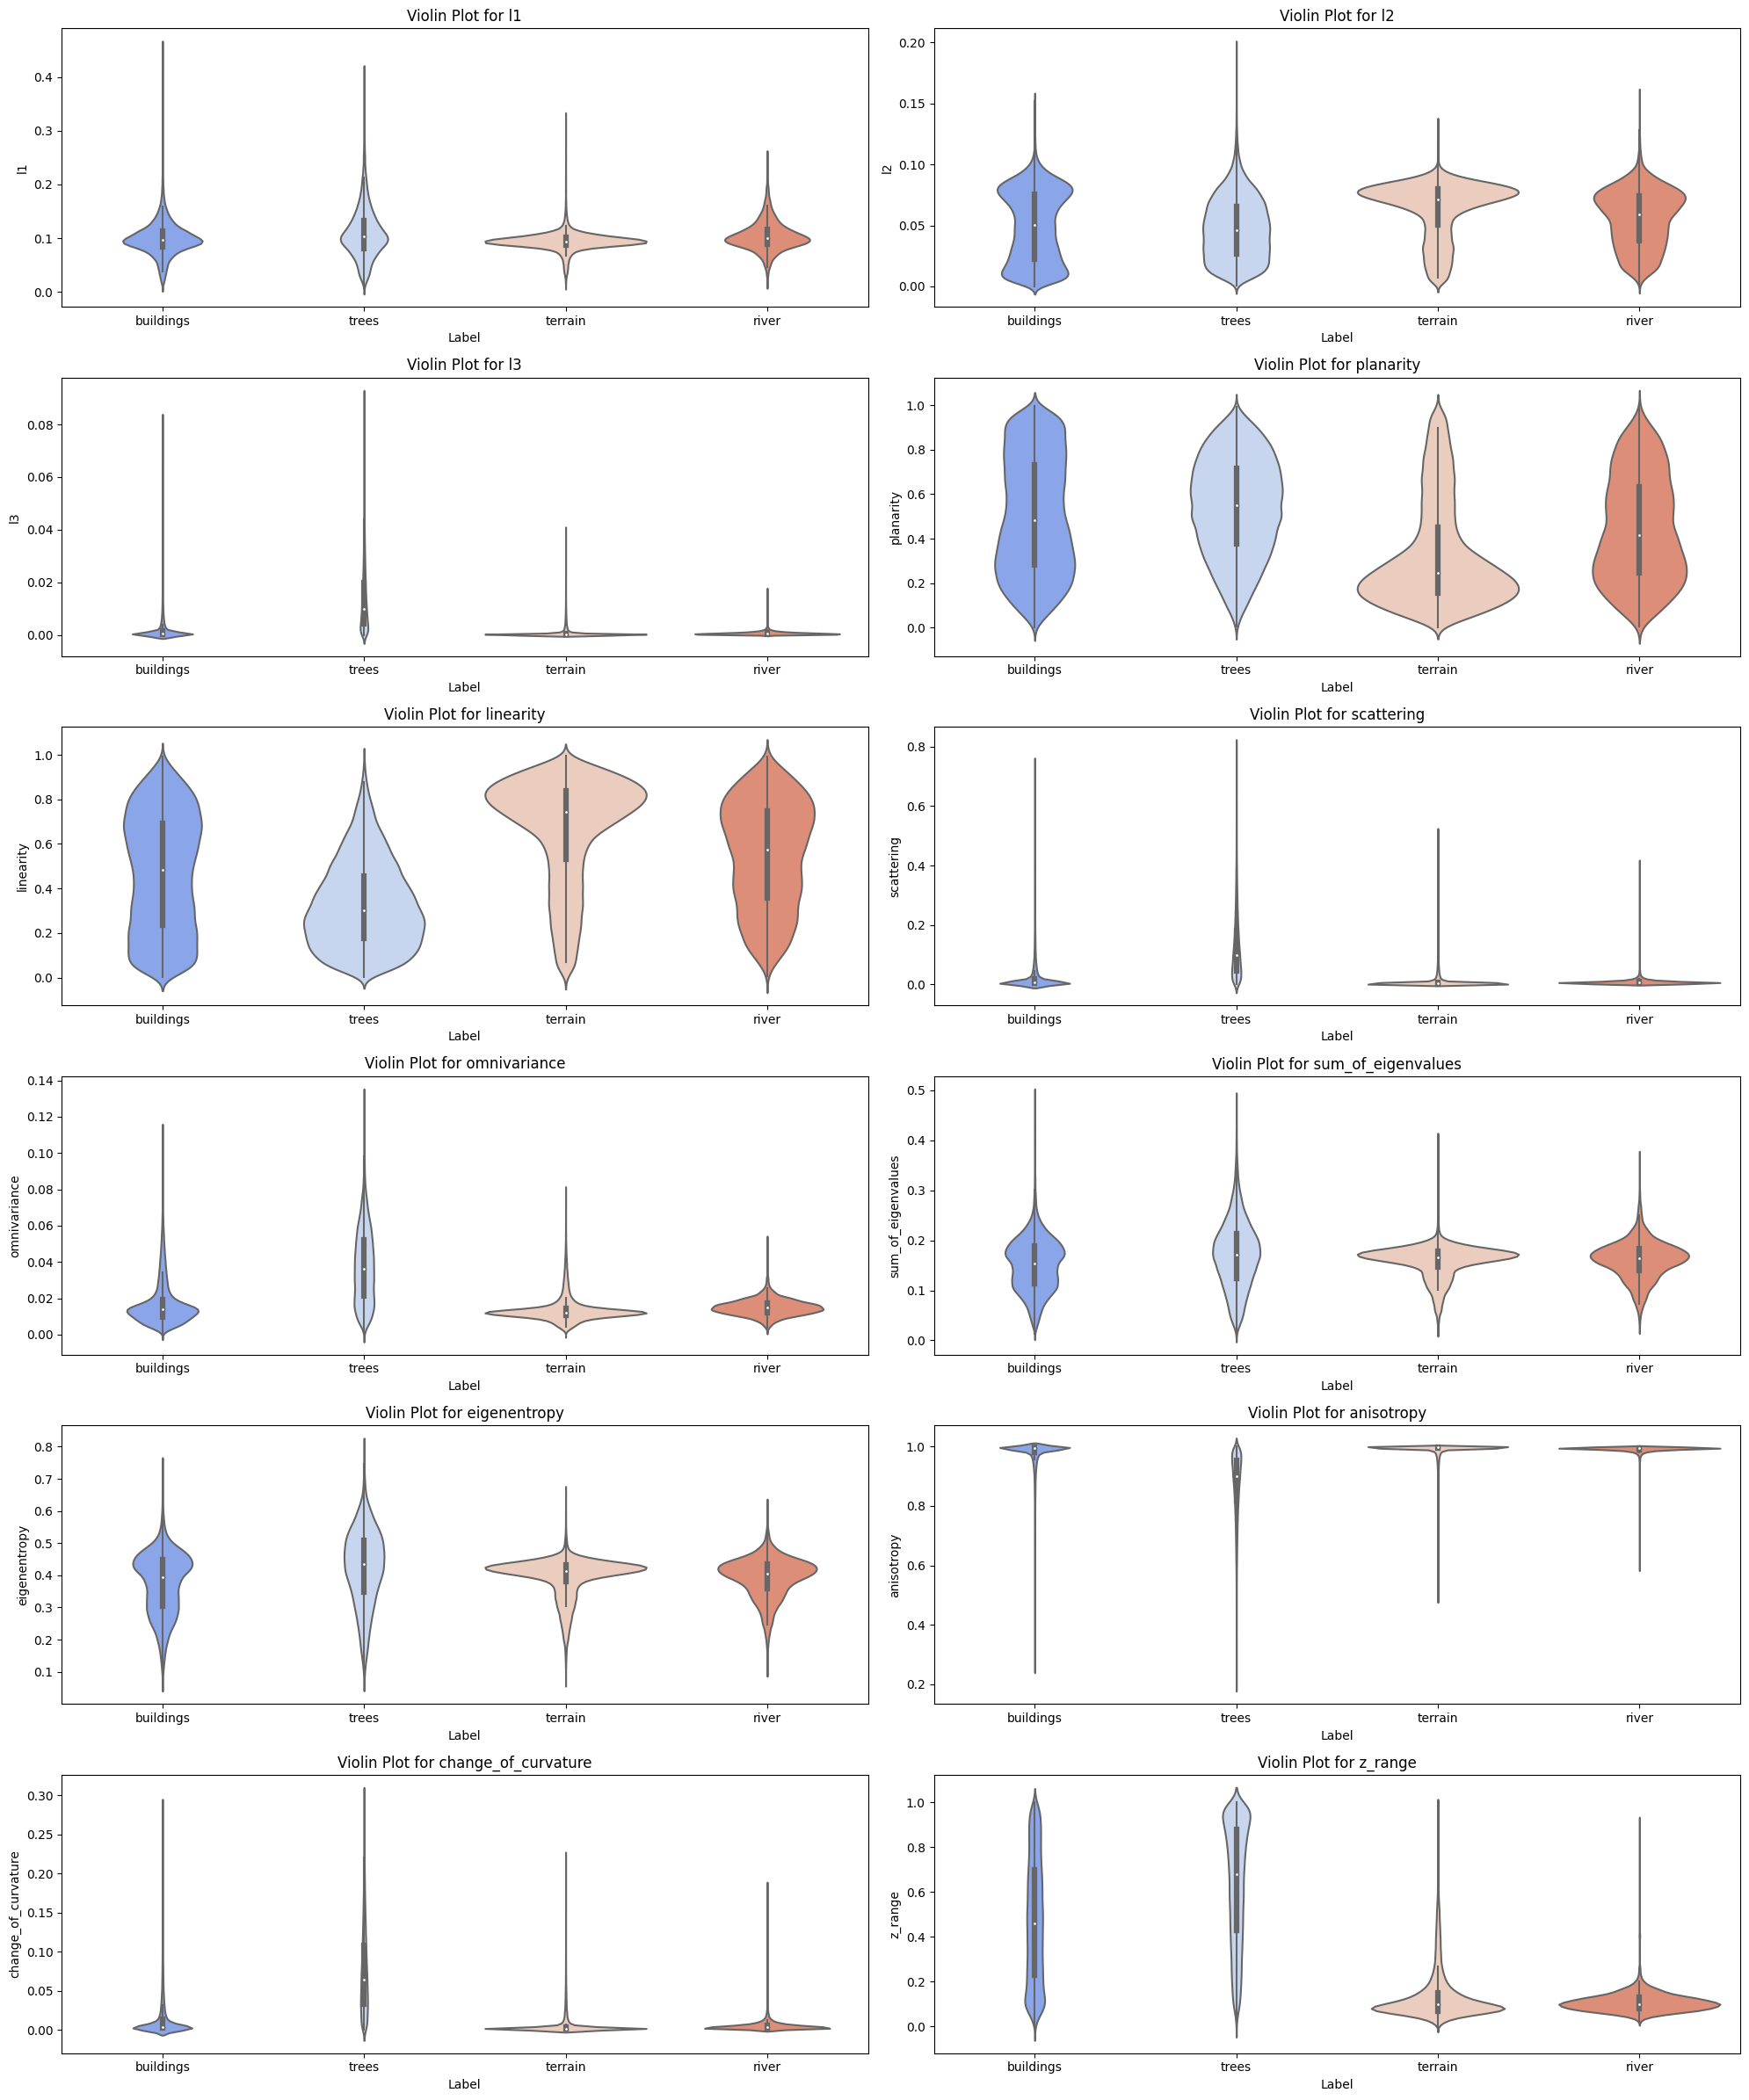

In [31]:
train_plotter.heatmap()
train_plotter.box_plot()
train_plotter.histogram()
train_plotter.violin()

### Training

In [32]:
auto_gluon.fit()

INFO:src.common.logger.logger:A model has already been trained and saved at C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\models\auto_gluon\ag_model_300
INFO:src.common.logger.logger:Loading model.
INFO:src.common.logger.logger:Model loaded.


### Predicting

In [33]:
auto_gluon.predict()

INFO:src.common.logger.logger:Loading predictions from C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\data\output\predictions\prediction_300.csv


## Building voxel grid

In [34]:
grid_builder: VoxelGridBuilder = VoxelGridBuilder(
    auto_gluon_model=auto_gluon,
    logger=logger
)

INFO:src.common.logger.logger:Building voxel grid...
INFO:src.common.logger.logger:Voxel grid built.


### Saving voxel grid

In [35]:
grid_builder.save_grid(mesh=grid_builder.voxel_grid_dto.voxel_grid, filename='voxel_grid')
grid_builder.save_grid(grid_builder.voxel_grid_dto.trees, 'trees')
grid_builder.save_grid(grid_builder.voxel_grid_dto.terrain, 'terrain')
grid_builder.save_grid(grid_builder.voxel_grid_dto.buildings, 'buildings')
grid_builder.save_grid(grid_builder.voxel_grid_dto.river, 'river')

INFO:src.common.logger.logger:Voxel grid saved to C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\data\output\voxel_grids\300_voxel_grid.ply
INFO:src.common.logger.logger:Voxel grid saved to C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\data\output\voxel_grids\300_trees.ply
INFO:src.common.logger.logger:Voxel grid saved to C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\data\output\voxel_grids\300_terrain.ply
INFO:src.common.logger.logger:Voxel grid saved to C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\data\output\voxel_grids\300_buildings.ply
INFO:src.common.logger.logger:Voxel grid saved to C:\Users\jatha\Code\NTNU\TBA4256-3D-Digital-Modelling\ScangelinaJolieV2\data\output\voxel_grids\300_river.ply
